In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_hdf('./data/tables_of_fgm.H5')
df.columns

Index(['zeta', 'f', 'pv', 'C2H3', 'C2H6', 'CH2', 'H2CN', 'C2H4', 'H2O2', 'C2H',
       'CN', 'heatRelease', 'NCO', 'NNH', 'N2', 'AR', 'psi', 'CO', 'CH4',
       'HNCO', 'CH2OH', 'HCCO', 'CH2CO', 'CH', 'mu', 'C2H2', 'C2H5', 'H2', 'T',
       'PVs', 'O', 'O2', 'N2O', 'C', 'C3H7', 'CH2(S)', 'NH3', 'HO2', 'NO',
       'HCO', 'NO2', 'OH', 'HCNO', 'CH3CHO', 'CH3', 'NH', 'alpha', 'CH3O',
       'CO2', 'CH3OH', 'CH2CHO', 'CH2O', 'C3H8', 'HNO', 'NH2', 'HCN', 'H', 'N',
       'H2O', 'HCCOH', 'HCNN'],
      dtype='object')

In [4]:
# Plotly
import plotly.offline as pyoff
import plotly.plotly as py
import plotly.tools as tls

In [5]:
# df_s=df.sample(frac=0.02)
df_s=df.loc[df['zeta']==list(set(df['zeta']))[0]].sample(frac=0.1)
sp='alpha'
fig_db = {
    'data': [
         {'x': df_s['f'],
         'y': df_s['pv'],
         'z': df_s[sp],
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          }
         }
        
    ],
    'layout': {
        'scene':{
            'xaxis':{'title':'mixture fraction'},
            'yaxis': {'title': "progress variable"},
            'zaxis': {'title': sp}
                 }
    }
}
pyoff.iplot(fig_db, filename='multiple-scatter')

In [6]:
df_test=pd.read_hdf('sim_check.H5',key='test')
df_pred=pd.read_hdf('sim_check.H5',key='pred')

In [7]:
zeta_level=list(set(df_test['zeta']))
zeta_level.sort()

In [25]:
df_t=df_test.loc[df_test['zeta']==zeta_level[1]].sample(frac=1)
df_p=df_pred.loc[df_pred['zeta']==zeta_level[1]].sample(frac=1)
sp='PVs'
error=df_p[sp]-df_t[sp]
fig_db = {
    'data': [
        
        {'name':'test',
        'x': df_t['f'],
         'y': df_t['pv'],
         'z': df_t[sp],
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          }
        },
        {'name':'predict',
            'x': df_p['f'],
         'y': df_p['pv'],
         'z': df_p[sp],
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          },
        },
        {'name':'error',
            'x': df_p['f'],
         'y': df_p['pv'],
         'z': error,
         'type':'scatter3d', 
        'mode': 'markers',
          'marker':{
              'size':1
          },
         }       
    ],
    'layout': {
        'scene':{
            'xaxis':{'title':'mixture fraction'},
            'yaxis': {'title': "progress variable"},
            'zaxis': {'title': sp}
                 }
    }
}
py.iplot(fig_db, filename='multiple-scatter')

/home/eg/anaconda3/envs/my_dev/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [9]:
import matplotlib.pyplot as plt

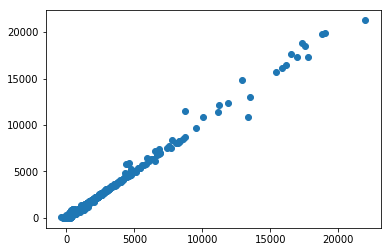

In [18]:
plt.scatter(df_pred[sp],df_test[sp])

In [26]:
from scipy.interpolate import griddata
df_new=df_t
x=df_new['f']
y=df_new['pv']
z=df_new[sp]
resX=200
resY=200
xi = np.linspace(min(x), max(x), resX)
yi = np.linspace(min(y), max(y), resY)
grid_x,grid_y = np.meshgrid(xi,yi)

Z = griddata(df_new[['f','pv']],df_new[sp], (grid_x, grid_y), method='linear')

In [27]:
import plotly.graph_objs as go
data=[
    go.Contour(
    z=np.nan_to_num(Z),
    x=xi,
    y=yi    
    )
]
pyoff.iplot(data)

In [28]:
df_new=df_p
x=df_new['f']
y=df_new['pv']
z=df_new[sp]
resX=200
resY=200
xi = np.linspace(min(x), max(x), resX)
yi = np.linspace(min(y), max(y), resY)
grid_x,grid_y = np.meshgrid(xi,yi)

Z = griddata(df_new[['f','pv']],df_new[sp], (grid_x, grid_y), method='linear')
import plotly.graph_objs as go
data=[
    go.Contour(
    z=np.nan_to_num(Z),
    x=xi,
    y=yi    
    )
]
pyoff.iplot(data)